In [1]:
import pandas as pd

In [2]:
#read in the data
master = pd.read_csv(r"C:\Users\hp 15\Downloads\compressed_master.csv\master.csv", parse_dates = ['year'])

In [3]:
master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987-01-01,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987-01-01,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987-01-01,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987-01-01,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987-01-01,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
master['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [5]:
master.groupby('age')['generation'].unique()

age
15-24 years                  [Generation X, Millenials]
25-34 years         [Boomers, Generation X, Millenials]
35-54 years             [Silent, Boomers, Generation X]
5-14 years     [Generation X, Millenials, Generation Z]
55-74 years          [G.I. Generation, Silent, Boomers]
75+ years                     [G.I. Generation, Silent]
Name: generation, dtype: object

In [6]:
#check for missing values
master.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
master.shape

(27820, 12)

In [8]:
master.country.nunique()

101

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

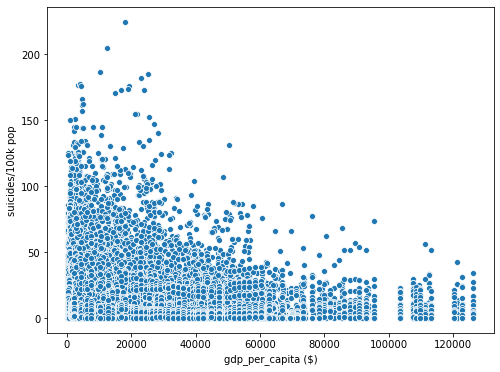

In [10]:
plt.figure(figsize = (8,6))
sns.scatterplot(master['gdp_per_capita'+ ' '+'($)'], master['suicides/100k pop'])

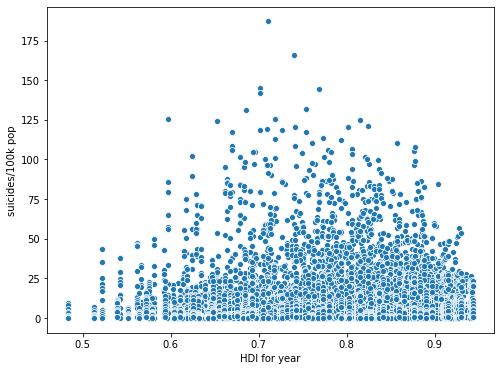

In [11]:
plt.figure(figsize = (8,6))
sns.scatterplot(master['HDI for year'], master['suicides/100k pop'])

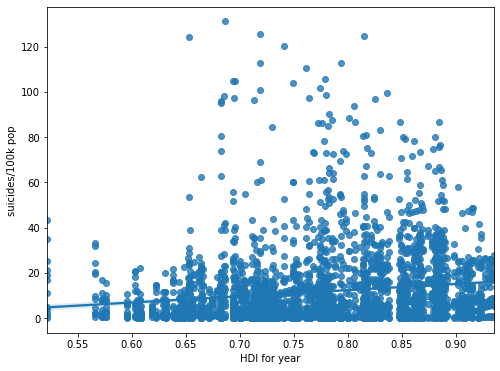

In [13]:
plt.figure(figsize = (8,6))
#Decreased the number of data point to be able to see the regression line
sns.regplot(master['HDI for year'].head(10000), master['suicides/100k pop'].head(10000))

In [14]:
master.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [15]:
#fill missing values with zero
master['HDI for year'] = master['HDI for year'].fillna(0)

In [16]:
master.groupby('country')['HDI for year'].unique()

country
Albania                    [0.0, 0.619, 0.6559999999999999, 0.695, 0.722]
Antigua and Barbuda         [0.0, 0.7809999999999999, 0.7829999999999999]
Argentina               [0.6940000000000001, 0.0, 0.705, 0.731, 0.762,...
Armenia                 [0.632, 0.0, 0.605, 0.648, 0.721, 0.723, 0.728...
Aruba                                                               [0.0]
                                              ...                        
United Arab Emirates                     [0.8220000000000001, 0.0, 0.828]
United Kingdom          [0.753, 0.0, 0.773, 0.8370000000000001, 0.865,...
United States           [0.841, 0.0, 0.8590000000000001, 0.87599999999...
Uruguay                 [0.667, 0.0, 0.6920000000000001, 0.711, 0.742,...
Uzbekistan              [0.0, 0.594, 0.625, 0.655, 0.6609999999999999,...
Name: HDI for year, Length: 101, dtype: object

In [17]:
master.dtypes

country                       object
year                  datetime64[ns]
sex                           object
age                           object
suicides_no                    int64
population                     int64
suicides/100k pop            float64
country-year                  object
HDI for year                 float64
 gdp_for_year ($)             object
gdp_per_capita ($)             int64
generation                    object
dtype: object

In [18]:
#picked 30 countries to use for predictive analysis
new_countries = ['Colombia', 'Brazil', 'Argentina', 'Uruguay', 'Chile', 'United States', 'Mexico', 'Canada', 'South Africa', 'Kuwait',
                'Germany', 'Norway', 'France', 'United Kingdom', 'Japan', 'Italy', 'United Arab Emirates', 'Republic of Korea','Denmark','Singapore',
                 'Albania', 'Russian Federation', 'Netherlands', 'Luxembourg', 'Israel', 'Ukraine', 'Finland', 'Hungary', 'Suriname', 'Iceland']

In [19]:
#spliting the data into train and test data
train_data = master[(master['year'] < '2010') & (master['country'].isin(new_countries))]
test_data = master[(master['year'] > '2009') & (master['country'].isin(new_countries))]

In [20]:
train_data.country.nunique()

30

In [21]:
test_data.shape

(1986, 12)

In [22]:
train_data = train_data.reset_index(drop = True)
test_data = test_data.reset_index(drop = True)

In [23]:
real_values = test_data['suicides/100k pop']
test_data.drop(['suicides/100k pop', 'suicides_no'], axis = 1, inplace = True)

In [24]:
train_data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [25]:
#encoding the sex column
train_data['sex'] = train_data['sex'].map({'female':1,'male':0})

In [26]:
#encoding the age column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data.age = encoder.fit_transform(train_data.age)

In [27]:
#encoding the generation column
train_data.generation = encoder.fit_transform(train_data.generation)

In [28]:
train_data.drop(['country-year'],axis = 1, inplace = True)

In [29]:
train_data.dtypes

country                       object
year                  datetime64[ns]
sex                            int64
age                            int32
suicides_no                    int64
population                     int64
suicides/100k pop            float64
HDI for year                 float64
 gdp_for_year ($)             object
gdp_per_capita ($)             int64
generation                     int32
dtype: object

In [30]:
#removing the comma in the gdp_for_year column
train_data.iloc[:,8] = train_data.iloc[:,8].str.replace(',', '')

In [31]:
#changing the data type of the column
train_data.iloc[:,8] = train_data.iloc[:,8].astype(float)

In [32]:
y = train_data['suicides/100k pop']

In [33]:
train_data.drop(['suicides/100k pop', 'suicides_no'], axis = 1, inplace = True)

In [34]:
train_data.columns

Index(['country', 'year', 'sex', 'age', 'population', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_data,y,test_size = 0.2, random_state = 0)

In [36]:
new_train_x = pd.get_dummies(train_x)
new_valid_x = pd.get_dummies(valid_x)

In [37]:
new_train_x['year'] = new_train_x['year'].dt.year
new_valid_x['year'] = new_valid_x['year'].dt.year

In [38]:
from sklearn.ensemble import RandomForestRegressor
model_1 = RandomForestRegressor(n_estimators = 1000)

In [39]:
model_1.fit(new_train_x, train_y)

RandomForestRegressor(n_estimators=1000)

In [40]:
prediction_1 = model_1.predict(new_valid_x)

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(valid_y, prediction_1) ** 0.5

4.94984892124476

In [42]:
from sklearn.metrics import r2_score
r2_score(valid_y, prediction_1)

0.9491235602715505

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(valid_y, prediction_1)

2.230638683076923

In [44]:
test_data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
population            0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [45]:
test_data.drop(['country-year'],axis = 1, inplace = True)

In [46]:
test_data['sex'] = test_data['sex'].map({'female':1,'male':0})

In [47]:
test_data.age = encoder.fit_transform(test_data.age)

In [48]:
test_data.generation = encoder.fit_transform(test_data.generation)

In [49]:
test_data.iloc[:,6] = test_data.iloc[:,6].str.replace(',', '')

In [50]:
test_data.iloc[:,6] = test_data.iloc[:,6].astype(float)

In [51]:
new_test = pd.get_dummies(test_data)

In [52]:
new_test.dtypes

year                            datetime64[ns]
sex                                      int64
age                                      int32
population                               int64
HDI for year                           float64
 gdp_for_year ($)                      float64
gdp_per_capita ($)                       int64
generation                               int32
country_Albania                          uint8
country_Argentina                        uint8
country_Brazil                           uint8
country_Canada                           uint8
country_Chile                            uint8
country_Colombia                         uint8
country_Denmark                          uint8
country_Finland                          uint8
country_France                           uint8
country_Germany                          uint8
country_Hungary                          uint8
country_Iceland                          uint8
country_Israel                           uint8
country_Italy

In [53]:
new_test.shape

(1986, 38)

In [54]:
new_test['year'] = new_test['year'].dt.year

In [55]:
model_prediction = model_1.predict(new_test)

In [56]:
r2_score(real_values, model_prediction)

0.8645627840995811

In [57]:
mean_squared_error(real_values, model_prediction)** 0.5

6.472894877511771

In [58]:
#The model's prediction versus actual value
pd.DataFrame({'prediction': model_prediction, 'actual_value': real_values})

,prediction,actual_value
0,4.66398,8.27
1,1.86047,5.38
2,2.32224,5.01
3,4.71590,3.94
4,1.19703,3.58
...,...,...
1981,4.33093,9.91
1982,8.34020,8.63
1983,3.79783,6.66
1984,0.94938,1.19
